In [3]:
import numpy as np
import brfss
import thinkstats2
import thinkplot
import random

In [4]:
random.gauss(0, 1)

0.45681688512596247

In [19]:
def RMSE(estimates, actual):
    e2 = [(estimate - actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [48]:
def estimate1(n=7, m=1000):
    mu = 0
    sigma = 1
    
    means = []
    medians = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    
    print('rmse xbar:', RMSE(means, mu))
    print('rmse median:', RMSE(medians, mu))

In [49]:
estimate1()

rmse xbar: 0.3842449960404291
rmse median: 0.4759810564261068


In [50]:
def mean_error(estimates, actual):
    errors = [estimate - actual for estimate in estimates]
    return np.mean(errors)

In [51]:
def estimate2(n=7, m=1000):
    mu = 0
    sigma = 1
    
    estimates1 = []
    estimates2 = []
    for _ in range(m):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)
    
    print("mean error biased:", mean_error(estimates1, sigma**2))
    print("mean error biased:", mean_error(estimates2, sigma**2))

In [52]:
estimate2()

mean error biased: -0.1124823976262494
mean error biased: 0.0354372027693757


In [55]:
def simulate_sample(mu=90, sigma=7.5, n=9, m=1000):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
        
#     cdf = thinkstats2.MakeCdfFromList(means)
#     ci = cdf.Percentile(5), cdf.Percentile(95)
#     stderr = RMSE(means, mu)
    return means 

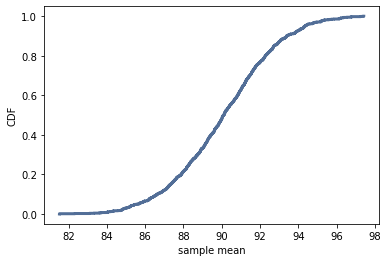

In [61]:
cdf = thinkstats2.Cdf(simulate_sample())
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='sample mean', ylabel='CDF')

In [86]:
import math 

def estimate3(n=7, m=1000):
    lam = 2
    means = []
    medians = []
    
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1/np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
        
    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', mean_error(means, lam))
    print('mean error Lm', mean_error(medians, lam))

In [96]:
estimate3()

rmse L 1.082715157344542
rmse Lm 1.6274882068011536
mean error L 0.3287252706888701
mean error Lm 0.4374601804771769


In [ ]:
# exercise 1

In [343]:
def bias_test1(n=7, sims=1000):
    mu = 0
    sigma = 1
    medians = []
    means = []
    
    for i in range(sims):
        sample = [random.gauss(mu, sigma) for i in range(n)]
        sample_mean = np.mean(sample)
        sample_median = np.median(sample)
        means.append(sample_mean)
        medians.append(sample_median)
        
    print('Mean error xbar with {} iterations'.format(sims), mean_error(means, mu))
    print('Mean error median with {} iterations'.format(sims), mean_error(medians, mu))
    print() 

In [352]:
def bias_test2(n=7, sims=1000):
    mu = 0
    sigma = 1
    
    biased_estimates = []
    unbiased_estimates = []
    
    for i in range(sims):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        biased_estimates.append(biased)
        unbiased_estimates.append(unbiased)
        
    print('RMSE (biased) with {} iterations:'.format(sims),\
          RMSE(biased_estimates, sigma**2)) 
    
    print('RMSE (unbiased) with {} iterations'.format(sims),\
          RMSE(unbiased_estimates, sigma**2))
    print()

In [355]:
bias_test1(sims=100)
bias_test1(sims=100000)

Mean error xbar with 100 iterations -0.004859565954078076
Mean error median with 100 iterations -0.006484800999858256

Mean error xbar with 100000 iterations 0.0006877612365771352
Mean error median with 100000 iterations 0.0011394102241477002



In [392]:
bias_test2(sims=1000)
bias_test2(sims=100000)

RMSE (biased) with 1000 iterations: 0.5293433096319883
RMSE (unbiased) with 1000 iterations 0.6013656687574124

RMSE (biased) with 100000 iterations: 0.5166232376736958
RMSE (unbiased) with 100000 iterations 0.5793974619893391



In [ ]:
# exercises 2

In [346]:
def expon_estimate(n=10, m=1000):
    lam = 2
    means = []
    medians = []
    
    for _ in range(m):
        xs = np.random.exponential(1.0/lam, n)
        L = 1/np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)
        
    return means, medians, RMSE(means, lam)

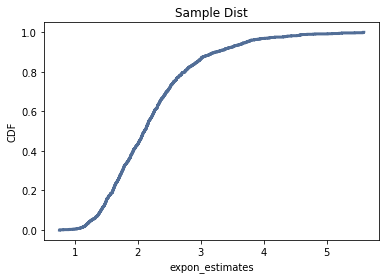

In [347]:
expon_sample_means, epon_sample_medians, rmse = expon_estimate()
expon_cdf = thinkstats2.Cdf(expon_sample_means)
ci_lower, ci_upper = expon_cdf.Percentile(5), expon_cdf.Percentile(95)

thinkplot.Cdf(expon_cdf)
thinkplot.Config(xlabel='expon_estimates', ylabel='CDF', title='Sample Dist')

Confidence interval: 1.2643307825818018 to 3.719350661228308


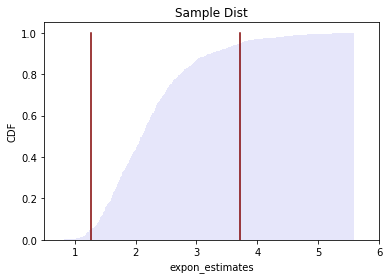

In [390]:
import matplotlib.pyplot as plt

plt.title('Sample Dist')
plt.hist(expon_sample_means, cumulative=True, density=1, bins=500, color='lavender')
plt.plot([ci_lower, ci_lower], [0,1], color='maroon')
plt.plot([ci_upper, ci_upper], [0,1], color='maroon')
plt.ylabel('CDF')
plt.xlim([0.5, 6])
plt.xlabel('expon_estimates')
plt.savefig('expon_sample_dist.png')
print('Confidence interval: {} to {}'.format(ci_lower, ci_upper))

In [349]:
rmses = []
for i in range(5, 50):
    mean, median, rmse = expon_estimate(n=i, m=1000)
    rmses.append(rmse)

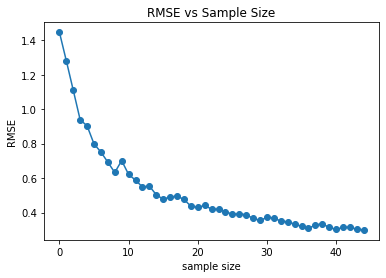

In [391]:
plt.title('RMSE vs Sample Size')
plt.scatter(range(len(rmses)), rmses)
plt.plot(range(len(rmses)), rmses)
plt.ylabel('RMSE')
plt.xlabel('sample size')
plt.savefig('rmse_sample_sizes.png')

In [ ]:
# exercise 3

In [507]:
def score_simulator(lam):
    score = 0
    timer = 0
    while timer < 1:
        timer += np.random.exponential(1/lam)
        score +=1
    return score

In [579]:
def game_simulator(lam, num_games):
    est = [score_simulator(lam) for i in range(num_games)]
    rmse = RMSE(est, lam)
    stderr = mean_error(est, lam)
    cdf = thinkstats2.Cdf(est)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval:', ci)
    print('stderr', stderr)
    print('RMSE', rmse)
    
    return est

In [575]:
games = game_simulator(lam=2, num_games=10000)

confidence interval: (1, 6)
stderr 1.0074
RMSE 1.7291616465790582


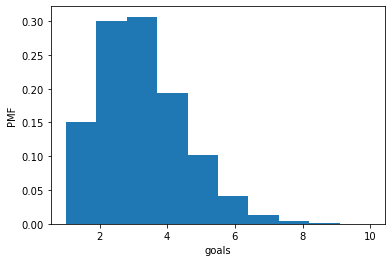

In [548]:
plt.hist(games, density=1, bins=10)
plt.ylabel('PMF')
plt.xlabel('goals')
plt.savefig('goals.png')

In [581]:
for i in range(1,100):
    game_simulator(lam=i, num_games=1000)

stderr 0.957
stderr 1.017
stderr 1.025
stderr 1.011
stderr 0.91
stderr 1.079
stderr 0.9
stderr 1.09
stderr 1.01
stderr 1.141
stderr 1.063
stderr 1.039
stderr 0.981
stderr 1.06
stderr 1.024
stderr 0.743
stderr 1.167
stderr 0.67
stderr 1.349
stderr 0.997
stderr 0.816
stderr 1.096
stderr 1.036
stderr 0.951
stderr 1.048
stderr 1.032
stderr 0.929
stderr 1.427
stderr 1.099
stderr 1.099
stderr 0.977
stderr 0.758
stderr 1.026
stderr 1.325
stderr 1.023
stderr 1.034
stderr 1.167
stderr 0.735
stderr 1.286
stderr 1.057
stderr 1.047
stderr 1.213
stderr 0.882
stderr 0.897
stderr 0.89
stderr 1.155
stderr 0.601
stderr 1.149
stderr 1.268
stderr 1.194
stderr 1.209
stderr 0.926
stderr 1.19
stderr 1.015
stderr 1.23
stderr 0.939
stderr 1.167
stderr 0.991
stderr 1.289
stderr 1.148
stderr 0.618
stderr 1.329
stderr 0.795
stderr 0.496
stderr 1.128
stderr 0.523
stderr 0.606
stderr 0.262
stderr 1.124
stderr 0.404
stderr 0.403
stderr 0.943
stderr 0.553
stderr 1.391
stderr 1.59
stderr 0.817
stderr 0.763
stderr 0.7

In [568]:
### markdown 

### Exercise 8-1:
Mean error xbar with 1000 iterations -0.006220527601712476 <br>
Mean error median with 1000 iterations -0.005275135799537794 <br><br>

Mean error xbar with 100000 iterations 0.00017962760594859587<br>
Mean error median with 100000 iterations -0.0005995797492975744<br>

RMSE (biased) with 1000 iterations: 0.5293433096319883<br>
RMSE (unbiased) with 1000 iterations 0.6013656687574124<br><br>

RMSE (biased) with 100000 iterations: 0.5166232376736958<br>
RMSE (unbiased) with 100000 iterations 0.5793974619893391<br>

#### Conclusion: 
Increasing the number of simulations for estimating the mean and median did have an impact i.e. as the number of simulations increased the mean error for the mean and median approached 0, suggesting no clear bias. When running simulations for estimating variance
the biased estimator had a lower RMSE than the unbiased estimator even when the number of simulations increased.

### Exercise 8-2:
* Confidence interval: 1.2643307825818018 to 3.719350661228308
![expon_dist](expon_sample_dist.png)

![RMSE_v_sample_size](rmse_sample_sizes.png)

### Exercise 8-3:
![goals](goals.png)
* stderr 0.9975<br>
* RMSE 1.7301<br>
* confidence interval: (1, 6)
* As lambda increases the RMSE does as well. But that's just because the value of lambda is getting larger. 